In [ ]:
import escape as esc
import numpy as np
import matplotlib.pyplot as plt
from escape.utils.widgets import show
esc.require("0.9.7")

In [ ]:
q = esc.var("Q")

# SAXS. Form-factors. CoreShell

Original: https://www.ncnr.nist.gov/resources/sansmodels/CoreShell.html

Author: Denis Korolkov

Calculates the form factor, $P(q)$, for a monodisperse spherical particle with a core-shell structure. The form factor is normalized by the total particle volume.


## Parameters

Parameter|	Variable| Value
---------|----------|--------
0|	Scale|	1.0
1|	Core Radius (Å)|	60.0
2|	Shell Thickness (Å)|	10.0
3|	Core SLD ($Å^{-2}$)|	1.0e-6
4|	Shell SLD ($Å^{-2}$)|	2.0e-6
5|	Solvent SLD ($Å^{-2}$)|	3.0e-6
6|	incoherent Background(cm^{-1})|	0.000


## Usage notes

The function calculated is:

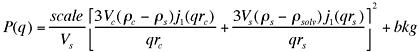

where   and equation 4 The returned value is scaled to units of $cm^{-1}$.

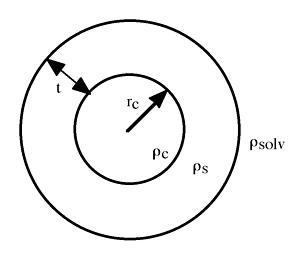

Parameter[0] (scale) and the SLD's are multiplicative factors in the model and are perfectly correlated. No more than one of these parameters can be free during the model fitting.



## Reference

Guinier, A. and G. Fournet, "Small-Angle Scattering of X-Rays", John Wiley and Sons, New York, (1955).



In [ ]:
#Definition of parameters
I0 = esc.par("Scale", 1, scale=1e8, fixed=True)
Rc = esc.par("Core Radius", 60, units=esc.angstr)
S = esc.par("Shell thickness", 10, units=esc.angstr)
rho_c = esc.par("Core SLD", 1, scale=1e-6, units=f"{esc.angstr}⁻²")
rho_s = esc.par("Shell SLD", 2, scale=1e-6, units=f"{esc.angstr}⁻²")
rho_solv = esc.par("Solvent SLD", 3, scale=1e-6, units=f"{esc.angstr}⁻²")
bkgr = esc.par("Background", 0.0, userlim=[0, 0.03])

#Model equations

Rs = Rc+S

Vc = 4/3 * np.pi*Rc**3
Vs = 4/3 * np.pi*Rs**3

QRc = q*Rc
QRs = q*Rs

jc = (esc.sin(QRc)-QRc*esc.cos(QRc))/QRc**3
js = (esc.sin(QRs)-QRs*esc.cos(QRs))/QRs**3

P = I0/Vs*(3*Vc*(rho_c-rho_s)*jc+3*Vs*(rho_s-rho_solv)*js)**2+bkgr

show(P, coordinates=np.linspace(0.001, 0.7, 256), figtitle="CoreShell", 
     xlog=True, ylog=True, xlabel=f"Q [{esc.angstr}⁻¹]", ylabel="P(q)[cm⁻¹]")